## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## data load

In [2]:
df = pd.read_csv('data/train.txt', delimiter=';', header = None, names = ['sentence', 'label'])
val_df = pd.read_csv('data/val.txt', delimiter=';', header = None, names = ['sentence', 'label'])
test_df = pd.read_csv('data/test.txt', delimiter=';', header = None, names = ['sentence', 'label'])

In [3]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [4]:
df.label.value_counts()

,count
label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


## data visualization

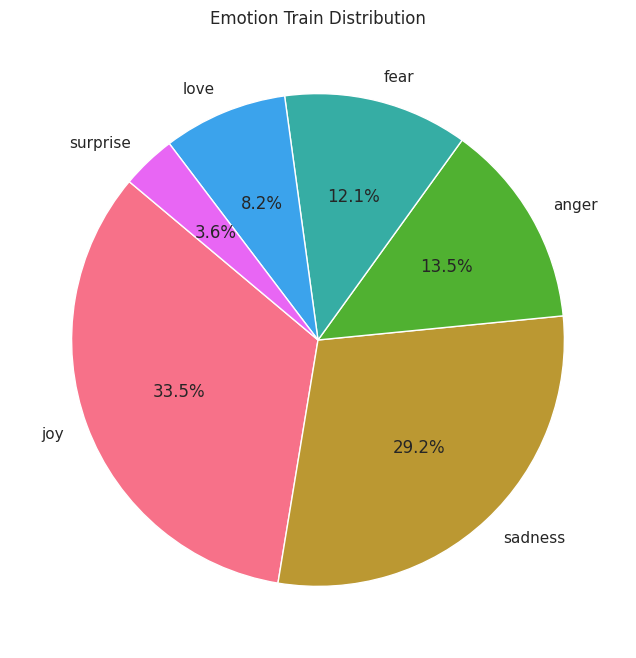

In [5]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

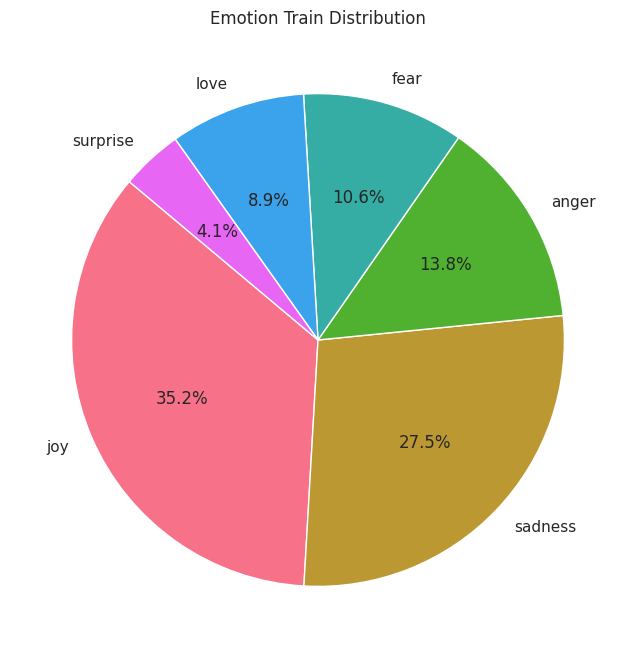

In [6]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

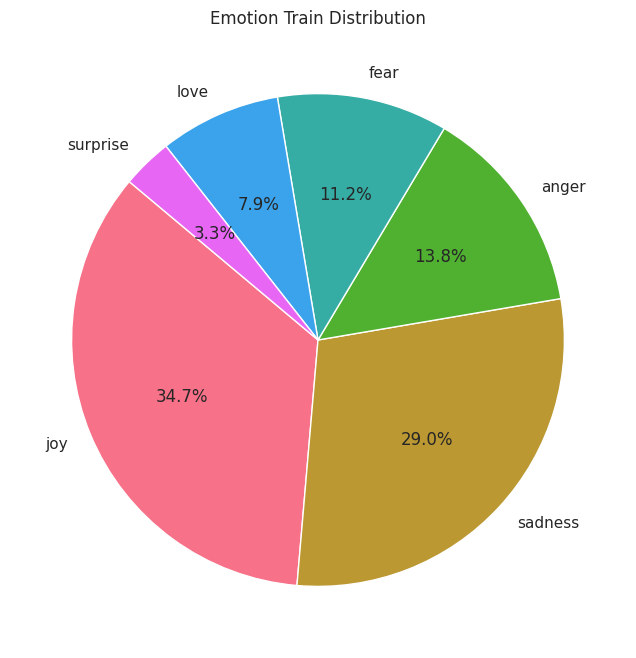

In [7]:
# Count label distributions
label_counts = test_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

## data handling

In [8]:
df = df[~df['label'].str.contains('love')]
df = df[~df['label'].str.contains('surprise')]
df.label.unique()

array(['sadness', 'anger', 'fear', 'joy'], dtype=object)

In [9]:
joy = df[df['label'] == 'joy'].sample(n=2200, random_state=20)
sad = df[df['label'] == 'sadness'].sample(n=2200, random_state=20)
fear = df[df['label'] == 'fear'].sample(n=1917, random_state=20)
anger = df[df['label'] == 'anger'].sample(n=2159, random_state=20)
df_samples = pd.concat([joy, sad, fear, anger])
df = df_samples.sample(frac=1, random_state=20).reset_index(drop=True)

In [10]:
df.head()

,sentence,label
0,i did feel bad because its bagel day and i acc...,sadness
1,i feel somewhat alarmed,fear
2,i ran miles in my old custom orthotics and i s...,joy
3,i feel resentful about my education rel bookma...,anger
4,i feel more happiness and are more peaceful,joy


In [11]:
df.shape

(8476, 2)

In [12]:
df.label.value_counts()

,count
label,
sadness,2200
joy,2200
anger,2159
fear,1917


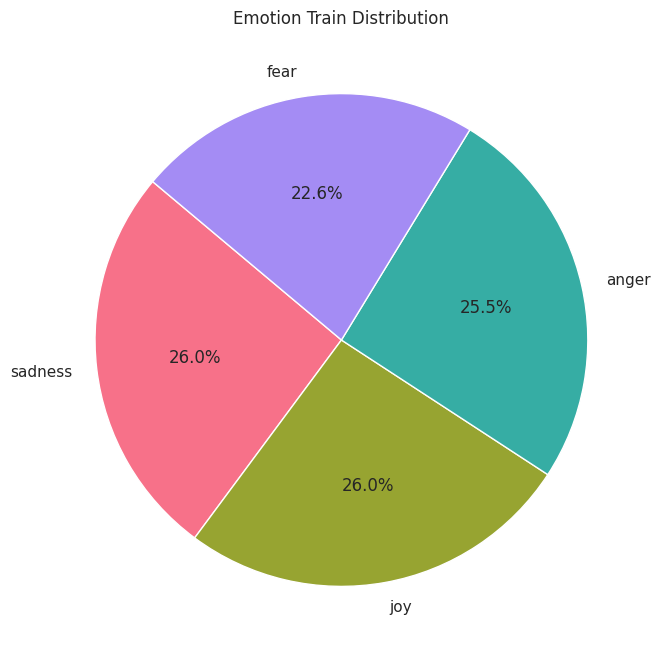

In [13]:
# Count label distributions
label_counts = df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [14]:
val_df = val_df[~val_df['label'].str.contains('love')]
val_df = val_df[~val_df['label'].str.contains('surprise')]
val_df.label.unique()

array(['sadness', 'anger', 'joy', 'fear'], dtype=object)

In [15]:
joy = val_df[val_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = val_df[val_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = val_df[val_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = val_df[val_df['label'] == 'anger'].sample(n=275, random_state=20)
df_samples = pd.concat([joy, sad, fear, anger])
val_df = df_samples.sample(frac=1, random_state=20).reset_index(drop=True)

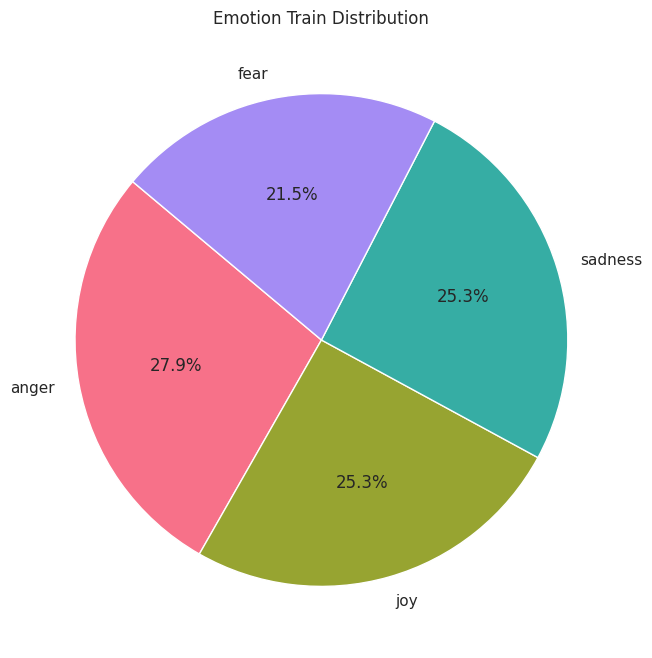

In [16]:
# Count label distributions
label_counts = val_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [17]:
test_df = test_df[~test_df['label'].str.contains('love')]
test_df = test_df[~test_df['label'].str.contains('surprise')]
test_df.label.unique()

array(['sadness', 'joy', 'fear', 'anger'], dtype=object)

In [18]:
joy = test_df[test_df['label'] == 'joy'].sample(n=250, random_state=20)
sad = test_df[test_df['label'] == 'sadness'].sample(n=250, random_state=20)
fear = test_df[test_df['label'] == 'fear'].sample(n=212, random_state=20)
anger = test_df[test_df['label'] == 'anger'].sample(n=275, random_state=20)
df_samples = pd.concat([joy, sad, fear, anger])
test_df = df_samples.sample(frac=1, random_state=20).reset_index(drop=True)

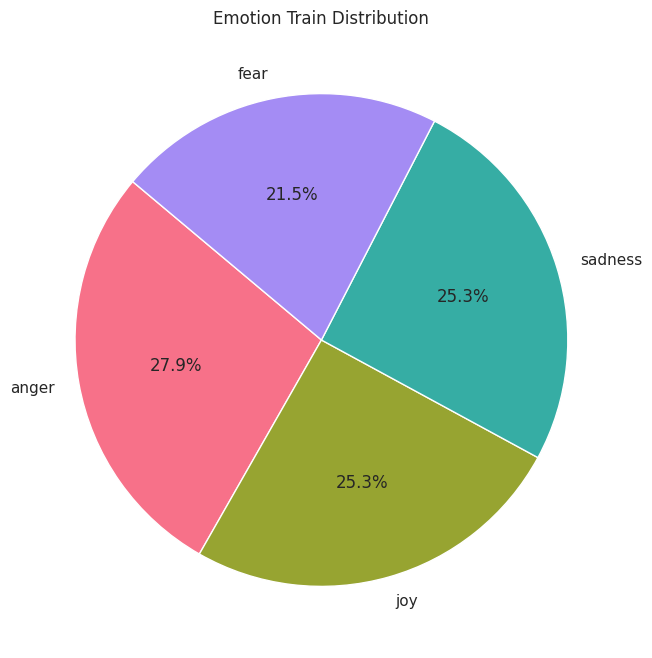

In [19]:
# Count label distributions
label_counts = test_df['label'].value_counts()
light_colors = sns.husl_palette(n_colors=len(label_counts))
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=light_colors)
plt.title('Emotion Train Distribution')
plt.show()

In [20]:
tr_text = df['sentence']
tr_label = df['label']

val_text = val_df['sentence']
val_label = val_df['label']

test_text = test_df['sentence']
test_label = test_df['label']

## Encoding (processing)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tr_label = le.fit_transform(tr_label)
val_label = le.fit_transform(val_label)
test_label = le.fit_transform(test_label)
print(tr_label)
print(val_label)
print(test_label)

[3 1 2 ... 0 0 3]
[2 1 2 0 1 1 0 2 1 1 1 3 0 2 2 1 2 2 2 3 2 0 3 1 3 3 0 1 3 2 3 2 1 3 3 3 2
 3 1 2 3 3 3 3 1 1 0 1 0 0 2 1 0 3 0 1 1 1 3 3 1 0 1 0 3 2 2 3 2 2 1 3 1 1
 0 3 0 0 3 0 1 0 1 3 3 1 1 3 0 2 3 1 2 1 2 1 2 2 1 3 1 0 0 1 2 2 2 0 0 1 2
 0 1 2 1 3 1 1 0 0 3 2 2 2 2 1 0 3 3 0 1 3 1 3 0 3 2 0 0 1 1 1 1 0 2 3 0 0
 3 0 2 3 1 3 2 3 2 0 2 3 0 2 3 2 0 2 2 2 2 2 1 0 3 3 2 0 3 3 0 0 2 3 3 3 2
 2 1 1 0 0 2 0 3 0 1 0 3 3 3 2 3 0 1 1 3 1 0 0 3 1 1 0 0 0 0 3 3 0 3 2 0 0
 2 0 3 3 1 3 1 2 1 0 3 3 1 3 2 1 3 2 0 2 0 1 3 3 0 1 1 1 2 2 3 3 1 2 1 2 0
 2 2 3 2 3 2 2 3 1 3 3 3 3 1 2 0 3 1 0 3 3 2 3 0 3 1 2 2 0 2 2 0 2 2 3 0 3
 1 3 0 3 0 2 1 2 0 0 2 1 1 2 3 1 2 2 3 2 0 1 2 3 1 2 1 1 1 0 0 2 2 3 0 0 3
 3 2 0 0 0 1 2 2 0 3 1 3 3 3 2 1 3 3 1 0 3 1 2 3 3 2 0 0 1 2 3 0 1 2 0 2 0
 1 1 1 0 1 2 0 1 3 3 0 3 1 1 1 1 0 3 3 3 3 2 3 3 2 0 0 3 2 0 0 3 2 0 3 0 0
 1 3 1 3 3 1 0 1 3 1 0 0 2 0 3 1 3 1 1 0 0 2 3 3 2 3 2 1 0 0 2 0 3 2 0 2 3
 2 1 2 2 0 1 1 2 1 3 0 0 3 3 0 2 1 1 0 0 3 2 0 2 3 0 3 1 0 0 0 1 2 3 1 0 0
 0 2 0 

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [23]:
class_vector =[2,5,6,1,4,2,3,2]
print(class_vector)
output_matrix = to_categorical(class_vector, num_classes = 7)
print(output_matrix)

[2, 5, 6, 1, 4, 2, 3, 2]
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [24]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tr_text)

sequance = tokenizer.texts_to_sequences(tr_text)
tr_x= pad_sequences(sequance, maxlen=100,padding='post')
tr_y = to_categorical(tr_label)

sequance = tokenizer.texts_to_sequences(val_text)
val_x= pad_sequences(sequance, maxlen=100,padding='post')
val_y = to_categorical(val_label)

sequance = tokenizer.texts_to_sequences(test_text)
test_x= pad_sequences(sequance, maxlen=100,padding='post')
test_y = to_categorical(test_label)

In [25]:
tokenizer.word_index

{'i': 1,
 'feel': 2,
 'and': 3,
 'to': 4,
 'the': 5,
 'a': 6,
 'feeling': 7,
 'that': 8,
 'of': 9,
 'my': 10,
 'in': 11,
 'it': 12,
 'like': 13,
 'im': 14,
 'so': 15,
 'me': 16,
 'for': 17,
 'but': 18,
 'was': 19,
 'have': 20,
 'am': 21,
 'is': 22,
 'with': 23,
 'this': 24,
 'about': 25,
 'not': 26,
 'be': 27,
 'as': 28,
 'on': 29,
 'when': 30,
 'just': 31,
 'or': 32,
 'you': 33,
 'at': 34,
 'because': 35,
 'all': 36,
 'do': 37,
 'more': 38,
 'up': 39,
 'can': 40,
 't': 41,
 'by': 42,
 'really': 43,
 'know': 44,
 'been': 45,
 'out': 46,
 'myself': 47,
 'very': 48,
 'are': 49,
 'if': 50,
 'little': 51,
 'what': 52,
 'time': 53,
 'get': 54,
 'how': 55,
 'being': 56,
 'from': 57,
 'had': 58,
 'want': 59,
 'now': 60,
 'people': 61,
 'they': 62,
 'would': 63,
 'will': 64,
 'her': 65,
 'he': 66,
 'some': 67,
 'them': 68,
 'him': 69,
 'think': 70,
 'one': 71,
 'even': 72,
 'still': 73,
 'bit': 74,
 'ive': 75,
 'an': 76,
 'make': 77,
 'life': 78,
 'going': 79,
 'its': 80,
 'who': 81,
 'somethi

In [26]:
len(tokenizer.word_counts)

10610

## Embedding & Model architecture

In [27]:
#Model paramter
vocab_size = 10628
embedding_dim = 128 # [10628, 128]
input_length = 100
num_classes = 4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.metrics import Precision, Recall



# Build the LSTM model with enhanced architecture
model = Sequential([
    # Embedding layer to convert words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),

    # Bidirectional LSTM layer to capture context from both directions
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Global Max Pooling to reduce sequence length and capture key features
    GlobalMaxPooling1D(),

    # Dense layer with regularization to learn complex representations
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout to further reduce overfitting

    # Output layer with softmax activation for multi-class classification
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy', Precision(), Recall()]
)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Define early stopping to prevent overfitting based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using training data and validation data
history = model.fit(
    tr_x, tr_y,  # Training inputs and outputs
    epochs=20,  # Maximum number of epochs
    batch_size=32,  # Batch size for training
    validation_data=(val_x, val_y),  # Validation data for monitoring
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.3570 - loss: 1.2863 - precision: 0.4358 - recall: 0.0687 - val_accuracy: 0.9129 - val_loss: 0.3962 - val_precision: 0.9656 - val_recall: 0.8531
Epoch 2/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 76s 168ms/step - accuracy: 0.9391 - loss: 0.2079 - precision: 0.9536 - recall: 0.9316 - val_accuracy: 0.9382 - val_loss: 0.2131 - val_precision: 0.9544 - val_recall: 0.9129
Epoch 3/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 45s 170ms/step - accuracy: 0.9773 - loss: 0.0791 - precision: 0.9803 - recall: 0.9713 - val_accuracy: 0.9331 - val_loss: 0.1916 - val_precision: 0.9499 - val_recall: 0.9230
Epoch 4/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.9842 - loss: 0.0515 - precision: 0.9847 - recall: 0.9827 - val_accuracy: 0.9341 - val_loss: 0.1790 - val_precision: 0.9454 - val_recall: 0.9291
Epoch 5/20
265/265 ━━━━━━━━━━━━━━━━━━━━ 84s 173ms/step - accuracy: 0.9920 - loss: 0.0364 - precision: 0.9923 - recall: 0.9915 - val_accuracy: 0.9362

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy, percision, recall = model.evaluate(test_x, test_y, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')

31/31 - 3s - 84ms/step - accuracy: 0.9443 - loss: 0.1597 - precision: 0.9516 - recall: 0.9362
Test Accuracy: 0.94


In [34]:
y_true =[]
for i in range(len(test_y)):
  x=np.argmax(test_y[i])
  y_true.append(x)

In [35]:
preds = model.predict(test_x)
y_pred = np.argmax(preds, axis=1)
y_pred

31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


array([2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 3, 0, 2, 2, 1, 2, 2, 2, 3, 2, 0,
       3, 1, 3, 2, 0, 1, 3, 2, 3, 2, 1, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3,
       1, 1, 3, 1, 0, 0, 2, 1, 0, 3, 0, 1, 1, 1, 3, 3, 1, 0, 1, 0, 3, 2,
       2, 2, 2, 2, 1, 3, 1, 1, 0, 3, 0, 0, 3, 0, 1, 0, 1, 3, 2, 1, 3, 2,
       0, 2, 3, 1, 2, 1, 2, 1, 2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 2, 0, 0, 3,
       2, 0, 1, 2, 1, 3, 1, 1, 0, 0, 3, 2, 2, 2, 2, 1, 0, 3, 3, 0, 1, 3,
       1, 3, 0, 3, 2, 0, 0, 1, 1, 1, 1, 2, 2, 3, 2, 0, 1, 0, 2, 3, 1, 2,
       2, 3, 2, 0, 2, 3, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 3, 2, 0,
       3, 2, 0, 0, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0, 2, 1, 3, 0, 1, 0, 3, 3,
       3, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 3, 3, 0, 3, 2,
       0, 0, 2, 0, 3, 3, 1, 3, 1, 2, 1, 0, 3, 3, 1, 3, 2, 1, 3, 2, 0, 2,
       0, 1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 0, 2, 2, 3, 2, 3,
       2, 2, 3, 1, 2, 3, 3, 3, 1, 2, 0, 3, 1, 0, 3, 3, 2, 3, 0, 3, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 3, 0, 3, 1, 3, 0, 3, 0,

<Axes: >

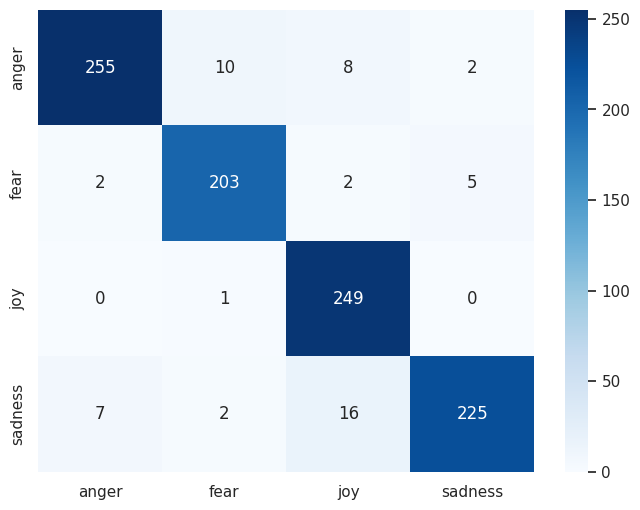

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(8,6))
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
emotions = list(emotions.values())
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

model.save('nlp.h5')

In [40]:
def predict(text, model_path, token_path):

    model = load_model(model_path)


    with open(token_path, 'rb') as f:
        tokenizer = pickle.load(f)

    sequences = tokenizer.texts_to_sequences([text])
    x_new = pad_sequences(sequences, maxlen=100)
    predictions = model.predict(x_new)

    emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}

    label = list(emotions.values())
    probs = list(predictions[0])

    labels = label

    plt.subplot(1, 1, 1)
    bars = plt.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax = plt.gca()
    ax.bar_label(bars, fmt = '%.2f')
    plt.show()

In [ ]:
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'sadness'}
list(emotions.values())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


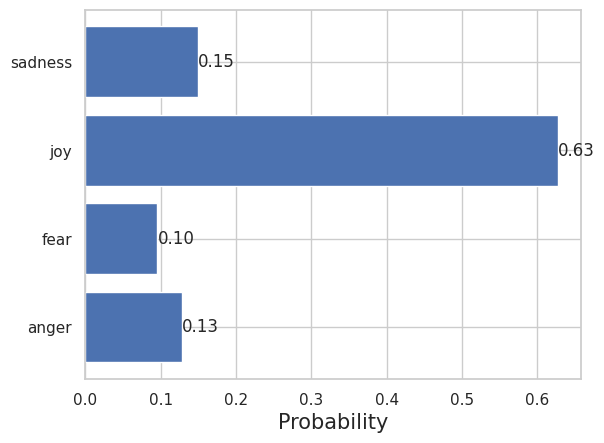

In [41]:
txt = 'I am very happy to finish this project'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


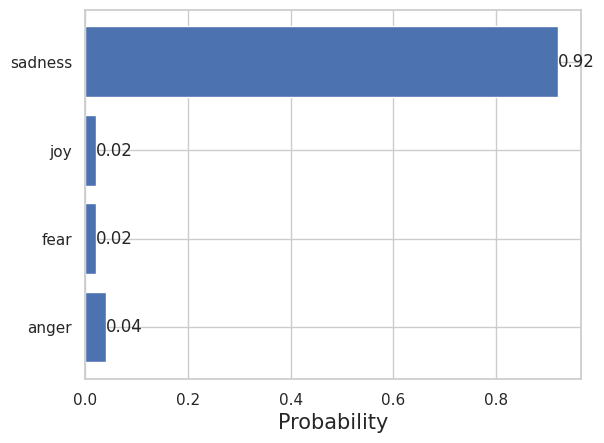

In [43]:
txt = 'I am very sad'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


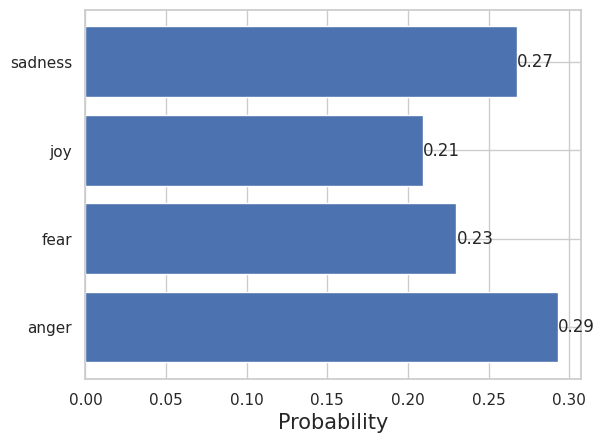

In [44]:
txt = 'Ahhhhhhhhhhhh, I wanna kill myself.'
predict(txt, 'nlp.h5', 'tokenizer.pkl')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


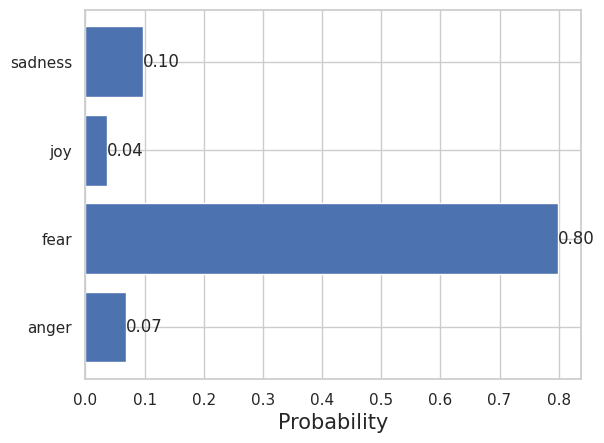

In [45]:
txt = 'I think, i am afraid.'
predict(txt, 'nlp.h5', 'tokenizer.pkl')